In [1]:
import re
import time
import glob

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Concatenate all the files

In [12]:
# get path to all files
recon_path = 'data/spectra/reconstructed/xgb/'
sig_path = 'data/spectra/simulated_data/'
recon_files = sorted(glob.glob(recon_path + 'recon_param_data_plot*.txt'), key=lambda x: int(re.search(r'\d+', x).group()))
sig_files = sorted(glob.glob(sig_path + 'model_parameters_data*.txt'), key=lambda x: int(re.search(r'\d+', x).group()))

params_path = 'data/params/'
# write_data = open(params_path + 'reconstructed_data_all_xgb.txt', 'w')
# write_params  = open('model_parameters_all.txt', 'w')

# # start timer
# start_timer = time.time()
# # read in all files
# for file in recon_files:
#     with open(file, 'r') as f:
#         # skip the first 10 lines in each file
#         for i in range(10):
#             f.readline()
#             # read in the data from each file
#         data = f.readlines()
#         # get the length of the data in each file
#         length = len(data)
#         # write the data to the output file in the same order as the files
#         for i in range(length):
#             write_data.write(data[i])
            
# # close the files
# write_data.close()
# # check how much time it took
# print(time.time() - start_timer)      

In [13]:
start_timer = time.time()
# get the params data
df_param = pd.DataFrame()
for file in sig_files:
    # get the parameters used
    df_param = df_param.append(pd.read_csv(file, skiprows=1, nrows=6, header=None, sep=' ', names=['A', 'B', 'C', 'D']))
    # save the dataframe to a csv file
    df_param.to_csv(params_path + 'model_parameters_data.csv', index=False)
    
print(time.time() - start_timer)

291.44757604599


#### Load the files 

In [16]:
start_time = time.time()
df_recon = pd.read_csv(params_path + 'reconstructed_data_all_xgb.txt', sep=' ', header=None) # all data dataframe
df_data = pd.read_csv(params_path + 'model_parameters_data_all.txt', sep=' ', header=None) # all data dataframe
print(time.time() - start_time)
# df_data.head()

55.67739176750183


In [17]:
# get the last 15000 from the df_data datatrame, to get the 
# the data points that was used in the prediction of the parameterss
df_sig = df_data.iloc[-53550000:]

In [18]:
df_recon.head()

,0,1
0,238.858,0.000
1,238.858,0.000
2,238.858,0.000
3,238.858,0.000
4,238.858,0.000


In [19]:
df_sig.head()

,0,1
124950000,238.858,0.000
124950001,238.858,0.000
124950002,238.858,0.000
124950003,238.858,0.000
124950004,238.858,0.000


In [20]:
print("Recon Shape: ", df_recon.shape,"Original sig Shape: ", df_sig.shape)

Recon Shape:  (53550000, 2) Original sig Shape:  (53550000, 2)


In [21]:
columns = ['Frequency', 'Intensity']
df_recon.columns = columns
df_sig.columns =  columns 

In [22]:
df_sig.head()

,Frequency,Intensity
124950000,238.858,0.000
124950001,238.858,0.000
124950002,238.858,0.000
124950003,238.858,0.000
124950004,238.858,0.000


In [23]:
df_recon.head()

,Frequency,Intensity
0,238.858,0.000
1,238.858,0.000
2,238.858,0.000
3,238.858,0.000
4,238.858,0.000


In [24]:
# get the frequency and intensity of the original synthethic spectra
freq_sig = np.array(np.array_split(df_sig['Frequency'], len(recon_files)))
inten_sig = np.array(np.array_split(df_sig['Intensity'], len(recon_files)))


# get the frequency and intensity of the predicted spectra
freq_recon = np.array(np.array_split(df_recon['Frequency'], len(recon_files)))
inten_recon = np.array(np.array_split(df_recon['Intensity'], len(recon_files)))

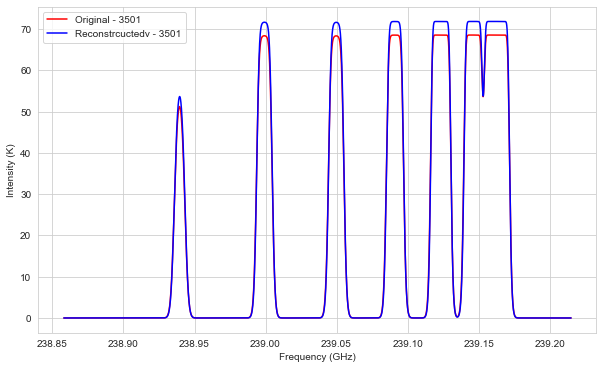

In [27]:
# plot the signal in one plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[0],  inten_sig[0], color='r', label='Original - 3501')
plt.plot(freq_recon[0], inten_recon[0], color='b', label="Reconstrcuctedv - 3501")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3501.png')
plt.show()

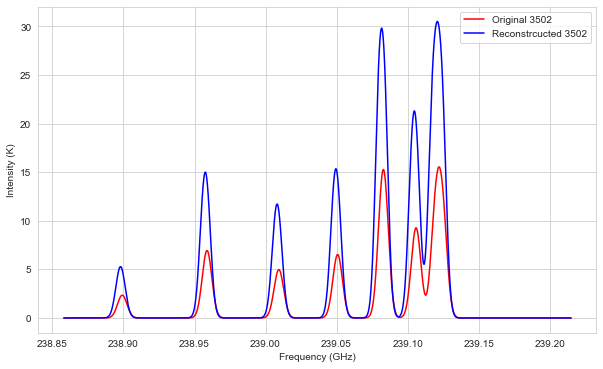

In [28]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1],  inten_sig[1], color='r', label='Original 3502')
plt.plot(freq_recon[1], inten_recon[1], color='b', label="Reconstrcucted 3502")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3502.png')
plt.show()

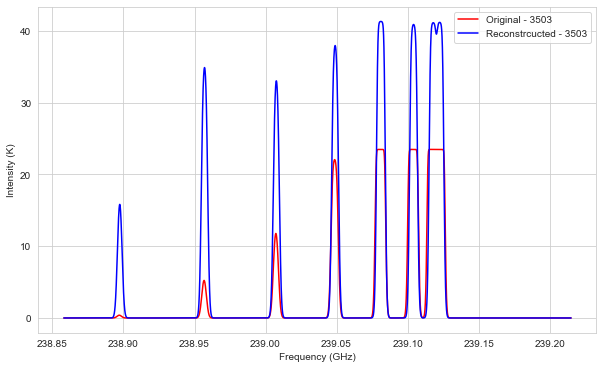

In [29]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[2],  inten_sig[2], color='r', label='Original - 3503')
plt.plot(freq_recon[2], inten_recon[2], color='b', label="Reconstrcucted - 3503")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3503.png')
plt.show()

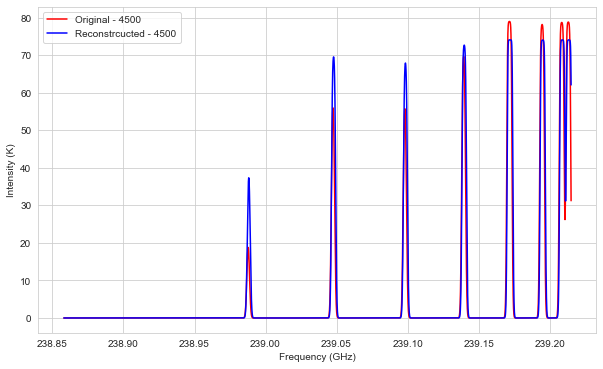

In [30]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1000],  inten_sig[1000], color='r', label='Original - 4500')
plt.plot(freq_recon[1000], inten_recon[1000], color='b', label="Reconstrcucted - 4500")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_4500.png')
plt.show()

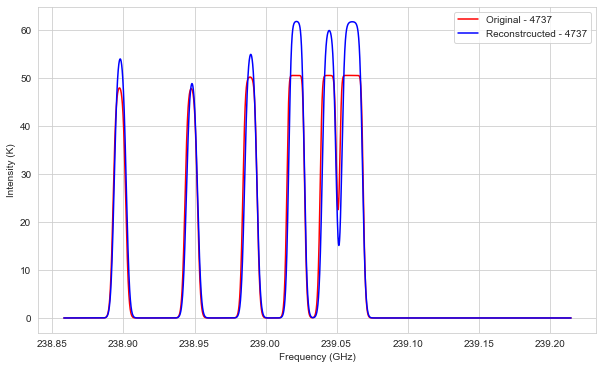

In [32]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1237],  inten_sig[1237], color='r', label='Original - 4737')
plt.plot(freq_recon[1237], inten_recon[1237], color='b', label="Reconstrcucted - 4737")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_4737.png')
plt.show()

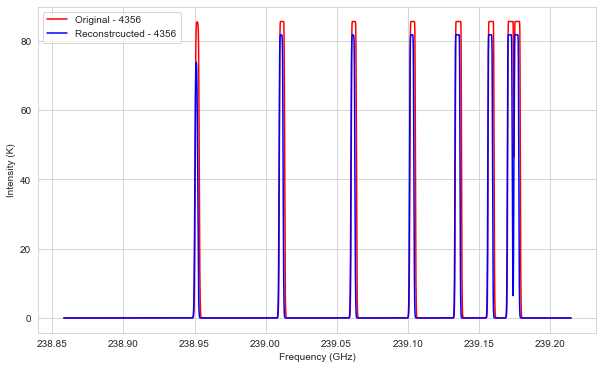

In [33]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[856],  inten_sig[856], color='r', label='Original - 4356')
plt.plot(freq_recon[856], inten_recon[856], color='b', label="Reconstrcucted - 4356")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_4356.png')
plt.show()

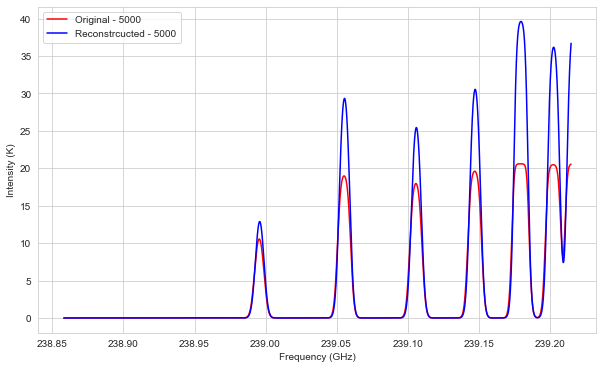

In [34]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1499],  inten_sig[1499], color='r', label='Original - 5000')
plt.plot(freq_recon[1499], inten_recon[1499], color='b', label="Reconstrcucted - 5000")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()

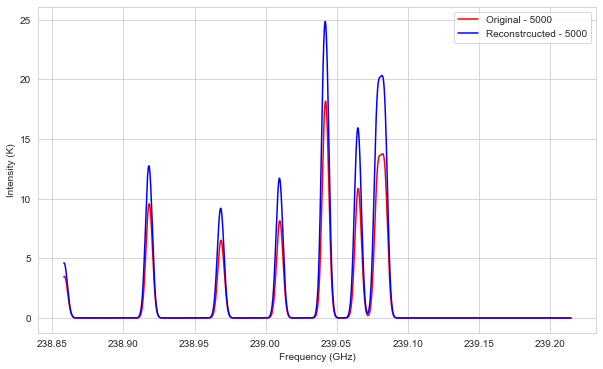

In [35]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[300],  inten_sig[300], color='r', label='Original - 5000')
plt.plot(freq_recon[300], inten_recon[300], color='b', label="Reconstrcucted - 5000")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()